In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters

In [14]:
df1=pd.read_excel('C:/Users/DELL/Downloads/EastWestAirlines.xlsx',sheet_name='data')

In [15]:
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [21]:
df2_norm = preprocessing.scale(df1)

In [22]:
df2_norm = pd.DataFrame(df2_norm)

In [23]:
df2_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


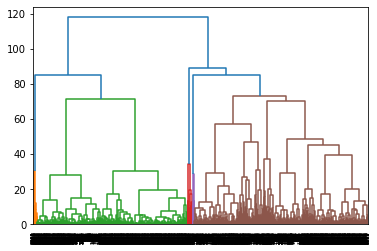

In [27]:
dendrogram = sch.dendrogram(sch.linkage(df2_norm, method='ward'))

# We decided to cut the tree at height 85 to obtain 3 clusters and then assigned each cluster with its respective observations

In [29]:
X = df2_norm.values

In [30]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [31]:
h_cluster = model.fit(X)

In [32]:
labels = model.labels_

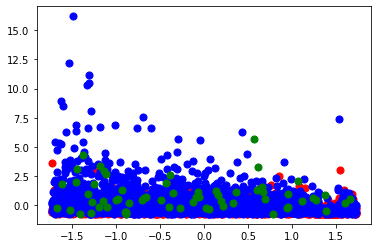

In [33]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

# K-Means

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df1_norm)

In [36]:
k_means

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [38]:
df1['k_cluster'] = k_cluster

In [39]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2321.6,42428.0,92.1,1.2,1.0,1.0,4906.6,7.0,194.8,0.6,3559.7,0.2
2,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8
3,1449.5,119793.0,164.1,3.6,1.0,1.0,39163.1,18.6,351.5,1.1,5140.5,0.6


In [40]:
pd.DataFrame(round(df1.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2535,2535,2535,2535,2535,2535,2535,2535,2535,2535,2535,2535
2,164,164,164,164,164,164,164,164,164,164,164,164
3,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300


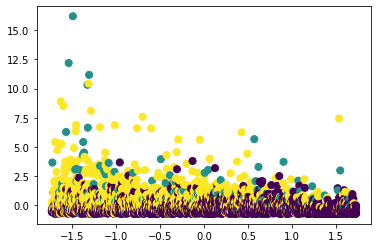

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='viridis')

# Conclusion
# we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.